### 一.原理
上一节介绍的基于KNN的异常检测算法，它是基于绝对距离进行的计算，对于某些特殊的数据分布，可能没法很好的识别异常点，如下图，$C_1,C2$两处显然都是正常的点，但由于它们的概率密度不同，$C_1$中的点很容易被KNN误识为异常点，而真正的异常点$o_1,o_2$反而不会被识别出来。
![avatar](./source/20_lof_01.png)  

所以，对于距离的考虑，不能过于“绝对”，而是要考虑“相对”的概念，接下来看看LOF（Local Ourlier Factor，局部异常因子）是如何处理的。

#### K-近邻距离(k-distance)

首先，定义距离数据点$p$最近的点中，第$k$个最近的点与点$p$之间的距离称为点$p$的k-近邻距离，记作$d_k(p)$  

#### 可达距离(rechability distance)

可达距离定义如下，其中$d(p,o)$表示点$p$与点$o$之间的直接距离
$$
rd_k(p,o)=\max\left\{d_k(o),d(p,o)\right\}
$$

#### 局部可达密度（local rachability density）
有了可达距离，就可以定义局部可达密度了

$$
lrd_k(p)=\frac{1}{\sum_{o\in N_k(p)}rd_k(p,o)/|N_k(p)|}
$$  

这里，$N_k(p)$表示与点$p$最近的$k$个点的集合，显然点$p$周围的数据点越密集，它的局部可达密度就越大，越稀疏，它的局部可达密度就越小   

#### 局部异常因子（local outlier factor）

接下来考虑，相对密度，将点$p$的最近$k$个点的平均局部可达密度跟数据点$p$的局部可达密度相比，便是LOF的定义：   

$$
LOF_k(p)=\frac{\sum_{o\in N_k(p)}lrd_k(o)}{|N_k(p)|}/lrd_k(p)
$$

### 二.代码实现

封装在ml_models.outlier_detect...

In [1]:
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

from ml_models.outlier_detect import LOF

In [2]:
#造数据
import numpy as np
X = np.c_[np.random.random(size=(100, 2)).T, np.random.random(size=(200, 2)).T * 5].T

In [3]:
#训练
lof = LOF()
score = lof.fit_transform(X)

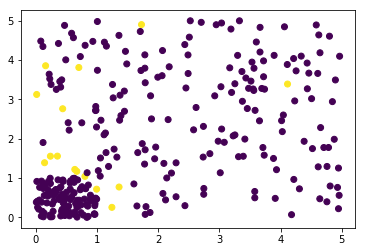

In [4]:
#预测
thresh=np.percentile(score,95)#前1%设置为异常值
plt.scatter(x=X[:, 0], y=X[:, 1], c=score > thresh)
plt.show()

虽然LOF解决了KNN中“绝对”距离的问题，但与KNN一样，它的主要瓶颈还是复杂度太高了，为$O(N^2)$   


参考:   
https://zhuanlan.zhihu.com/p/28178476